In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

from astropy.io import fits

In [2]:
bias_list = np.genfromtxt('test_bias/bias.list', dtype=str)
print(bias_list)

['AF435438.fits' 'AF435439.fits' 'AF435440.fits' 'AF435441.fits'
 'AF435442.fits' 'AF435443.fits' 'AF435444.fits' 'AF435445.fits'
 'AF435446.fits' 'AF435447.fits' 'AF435448.fits' 'AF435449.fits'
 'AF435450.fits' 'AF435451.fits' 'AF435452.fits' 'AF435453.fits'
 'AF435454.fits' 'AF435455.fits' 'AF435456.fits' 'AF435457.fits'
 'AF435458.fits' 'AF435459.fits' 'AF435460.fits' 'AF435461.fits'
 'AF435462.fits' 'AF435463.fits' 'AF435464.fits' 'AF435465.fits'
 'AF435466.fits' 'AF435467.fits']


In [3]:
cd test_bias/

/home/spiro/home/ponnekab/TASTE_analysis/test_bias


In [4]:
bias000_fits = fits.open(bias_list[0])

In [5]:
bias000_fits[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  521 / length of data axis 1                          
NAXIS2  =                  150 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
DATE    = '2017-03-29T19:47:39' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
FILENAME= 'AF435438.fits'      / Original file name                             
DATE-OBS= '2017-03-29T19:47:

In [6]:
bias000_airmass = bias000_fits[0].header['AIRMASS']
bias000_gain = bias000_fits[0].header['GAIN']
bias000_gain_comment = bias000_fits[0].header.comments['GAIN']
bias000_ron = bias000_fits[0].header['RDNOISE']
bias000_ron_comment = bias000_fits[0].header.comments['RDNOISE']

print('CCD Gain : {0:4.2f} {1:8s}'.format(bias000_gain, bias000_gain_comment) )

CCD Gain : 2.20 [e/ADU] CCD Camera gain


In [7]:
print('CCD Read out Noise: {0:4.2f} {1:8s}'.format(bias000_ron, bias000_ron_comment) )

CCD Read out Noise: 7.10 [e] CCD Camera readout noise


In [8]:
bias000_fits[0].data

array([[1452, 1451, 1454, ..., 1457, 1452, 1451],
       [1452, 1455, 1461, ..., 1454, 1465, 1450],
       [1451, 1453, 1451, ..., 1452, 1457, 1456],
       ...,
       [1458, 1442, 1451, ..., 1452, 1453, 1456],
       [1456, 1450, 1459, ..., 1453, 1456, 1455],
       [1455, 1448, 1460, ..., 1453, 1452, 1458]], dtype=uint16)

In [9]:
print(np.shape(bias000_fits[0].data))

(150, 521)


In [10]:
bias000_data= bias000_fits[0].data * bias000_gain

Text(0, 0.5, 'Y (pixels)')

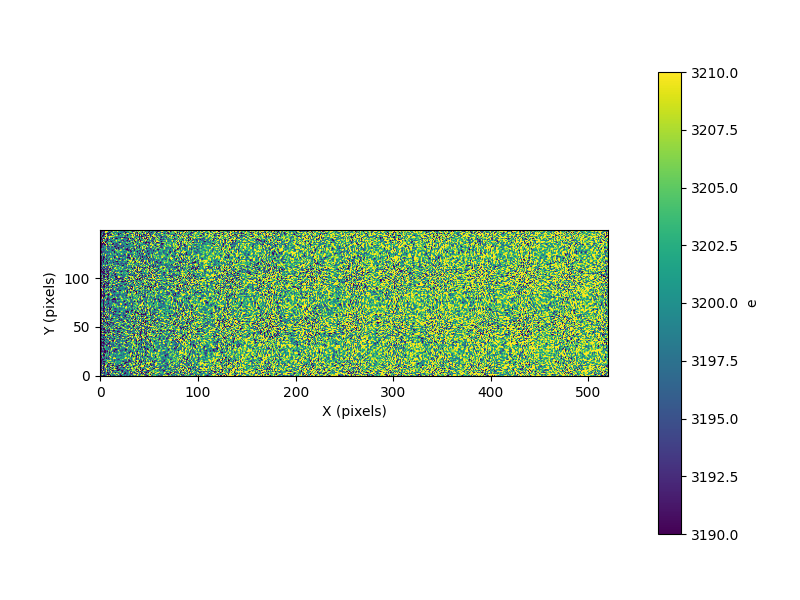

In [11]:
plt.figure(figsize=(8,6))
plt.imshow(bias000_data, origin='lower', vmin = 3190, vmax=3210)
cbar = plt.colorbar(fraction=0.1, pad=0.08)
cbar.set_label('e')
plt.xlabel('X (pixels)')
plt.ylabel('Y (pixels)')

In [12]:
n_images = len(bias_list)
print(n_images)

30


In [13]:
bias000_naxis1 = bias000_fits[0].header['NAXIS1']
bias000_naxis2 = bias000_fits[0].header['NAXIS2']

In [14]:
stack = np.empty([n_images, bias000_naxis2, bias000_naxis1])

In [15]:
for i_bias, bias_name in enumerate(bias_list):
    bias_temp = fits.open(bias_name) ##what
    stack[i_bias,:,:] = bias_temp[0].data * bias_temp[0].header['GAIN']
    bias_temp.close()

In [16]:
median_bias = np.median(stack, axis=0)
np.shape(median_bias)

(150, 521)

In [17]:
median_bias

array([[3203.2, 3191.1, 3201. , ..., 3202.1, 3203.2, 3205.4],
       [3196.6, 3190. , 3196.6, ..., 3198.8, 3199.9, 3202.1],
       [3199.9, 3190. , 3198.8, ..., 3201. , 3199.9, 3201. ],
       ...,
       [3198.8, 3191.1, 3197.7, ..., 3203.2, 3196.6, 3203.2],
       [3198.8, 3190. , 3197.7, ..., 3202.1, 3198.8, 3201. ],
       [3201. , 3190. , 3202.1, ..., 3197.7, 3201. , 3203.2]])

In [18]:
np.median(stack)

3203.2000000000003

Text(0, 0.5, 'Y (pixels)')

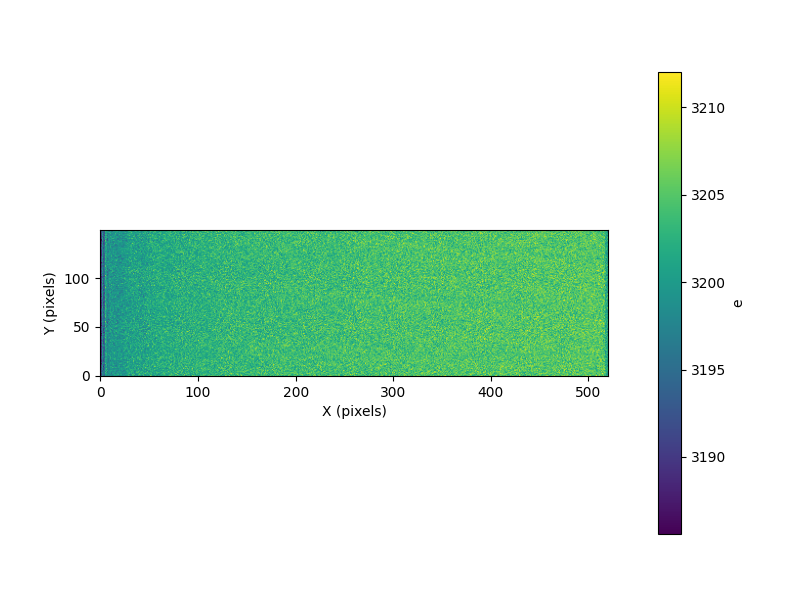

In [19]:
plt.figure(figsize=(8,6))
plt.imshow(median_bias, origin='lower')
cbar = plt.colorbar(fraction=0.1, pad=0.08)
cbar.set_label('e')
plt.xlabel('X (pixels)')
plt.ylabel('Y (pixels)')

In [20]:
max = np.median(bias000_data) + 2 * np.std(bias000_data)
min = np.median(bias000_data) - 2 * np.std(bias000_data)

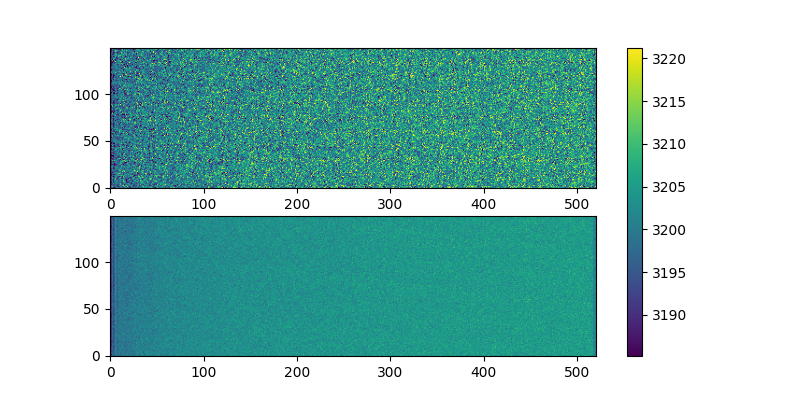

In [21]:
fig, ax = plt.subplots(2,1, figsize=(8,4))
im1 = ax[0].imshow(bias000_data, origin='lower', vmin = min, vmax=max)
im2 = ax[1].imshow(median_bias, origin='lower', vmin = min, vmax=max);
cbar = fig.colorbar(im1, ax=ax)

In [22]:
max

3221.1944943429185

## Statistical Analysis of the Bias

Average of the Median Bias by row:

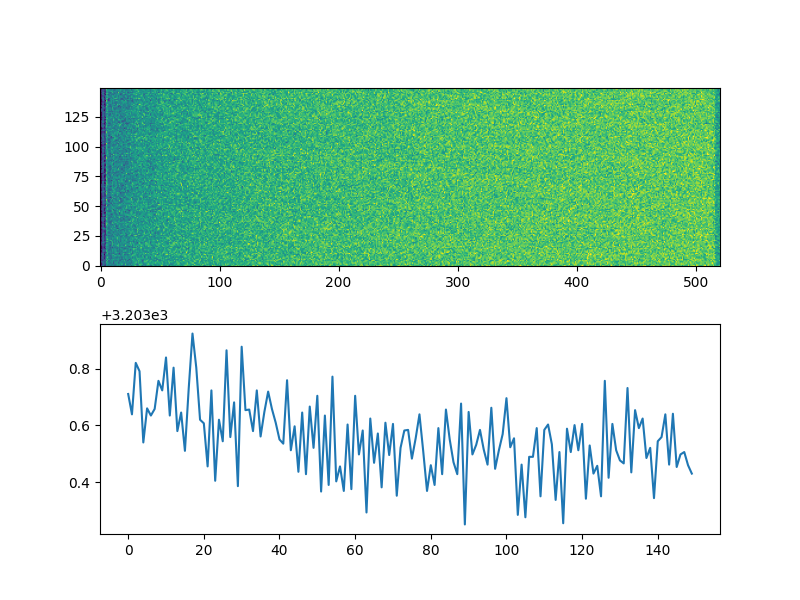

In [23]:
fig, ax = plt.subplots(2,1, figsize = (8,6))
im1 = ax[0].imshow(median_bias, origin='lower', vmin = 3190, vmax=3210)
median_row = np.average(median_bias, axis=1)
im2 = ax[1].plot(median_row)

In [24]:
#there is a visible trend in darkness to left, but along the row it's relatively constant.
#from the lower part moving upwards, there is no significant variation of our bias.

By column

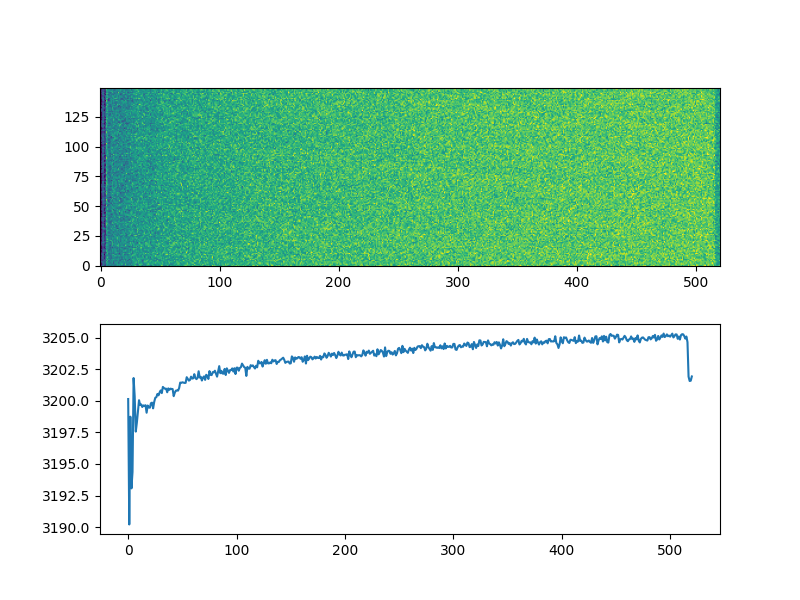

In [25]:
fig, ax = plt.subplots(2,1, figsize = (8,6))
im1 = ax[0].imshow(median_bias, origin='lower', vmin = 3190, vmax=3210)
median_column = np.average(median_bias, axis=0)
im2 = ax[1].plot(median_column)

In [26]:
#clear variation of at least 10 photoelectrons moving from the left side to the right side.

In [27]:
#if we zoom in on a section that is relatively constant, we can calculate the standard deviation.
#restrict to a smaller region.

starting_column = 300
ending_column = 350

In [28]:
print('Read out Noise', bias000_ron)
print('STD Single Frame, selected columns:', np.std(bias000_data[:, starting_column:ending_column]))

Read out Noise 7.1
STD Single Frame, selected columns: 8.87371404759022


In [29]:
print('Expected noise of median bias', bias000_ron/np.sqrt(n_images))
print('STD of median bias (selected region)', np.std(median_bias[:,starting_column:ending_column]))

Expected noise of median bias 1.296276719428893
STD of median bias (selected region) 2.0369006259510427


In [30]:
bias_std = np.std(stack,axis=0)
median_bias_error = np.std(stack, axis=0)/np.sqrt(n_images)

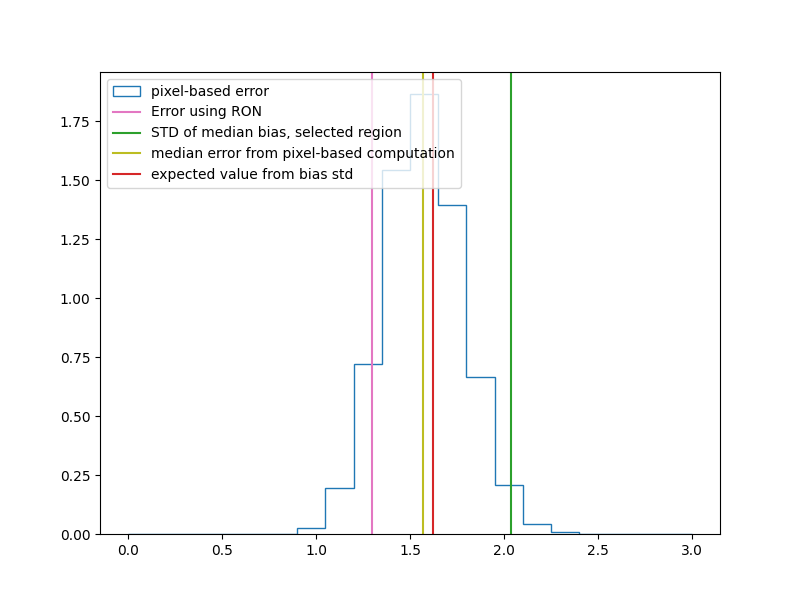

In [31]:
plt.figure(figsize=(8,6))
plt.hist(median_bias_error.flatten(), bins=20, range = (0,3.), 
         density = True, histtype='step', label='pixel-based error')
plt.axvline(bias000_ron / np.sqrt(n_images), label = 'Error using RON', c = 'C6')
plt.axvline(np.std(median_bias[:,starting_column:ending_column]), label = 'STD of median bias, selected region', c = 'C2')
plt.axvline(np.median(median_bias_error), label = 'median error from pixel-based computation', c = 'C8')
plt.axvline(np.std(bias000_data[:,starting_column:ending_column])/np.sqrt(n_images), label = 'expected value from bias std', c = 'C3')
plt.legend()
plt.show()

In [32]:
import pickle

pickle.dump(median_bias, open('median_bias.p', 'wb'))
pickle.dump(median_bias_error, open('median_bias_error.p', 'wb'))
pickle.dump(stack, open('stack_bias.p', 'wb'))


In [33]:
median_bias_reloaded = pickle.load(open('median_bias.p', 'rb'))